Part I

<div class="alert-warning">
    
Exercises 1,2,3,4 for this part must read you data from GitHub links, and the coding and results must be published using GitHub Pages

</div>


### Exercise 1

<div class="alert-success">
    
1. Use two maps of points from your country.

2. Compute the distance matrix for both maps.

3. Select one row of the distance matrix, and plot the two points with the minimal distance on top of the country of your choosing.
</div>

In [ ]:
#Se genera un nuevo Link con la extensión gpkg.
from  fiona import listlayers

canadaMapsLink='https://github.com/Journey-of-Success/tarea5/raw/main/canadaMaps_3347.gpkg'

#layers in maps
listlayers(canadaMapsLink)

['country', 'cities', 'rivers', 'centroid', 'airports']

In [ ]:
#Con los layers obtenidos trabajamos solo con 3 de estos
import geopandas as gpd

cities=gpd.read_file(canadaMapsLink,layer='cities')
airports=gpd.read_file(canadaMapsLink,layer='airports')
rivers=gpd.read_file(canadaMapsLink,layer='rivers')


In [ ]:
#Del repositorio del github usamos la data de la actividad anterior
import pandas as pd

portsFileLink="https://github.com/Journey-of-Success/tarea4_2/raw/main/data/UpdatedPub150.csv"
infoseaports=pd.read_csv(portsFileLink)

#columns available (so many)
infoseaports.columns.to_list()

['OID_',
 'World Port Index Number',
 'Region Name',
 'Main Port Name',
 'Alternate Port Name',
 'UN/LOCODE',
 'Country Code',
 'World Water Body',
 'IHO S-130 Sea Area',
 'Sailing Direction or Publication',
 'Publication Link',
 'Standard Nautical Chart',
 'IHO S-57 Electronic Navigational Chart',
 'IHO S-101 Electronic Navigational Chart',
 'Digital Nautical Chart',
 'Tidal Range (m)',
 'Entrance Width (m)',
 'Channel Depth (m)',
 'Anchorage Depth (m)',
 'Cargo Pier Depth (m)',
 'Oil Terminal Depth (m)',
 'Liquified Natural Gas Terminal Depth (m)',
 'Maximum Vessel Length (m)',
 'Maximum Vessel Beam (m)',
 'Maximum Vessel Draft (m)',
 'Offshore Maximum Vessel Length (m)',
 'Offshore Maximum Vessel Beam (m)',
 'Offshore Maximum Vessel Draft (m)',
 'Harbor Size',
 'Harbor Type',
 'Harbor Use',
 'Shelter Afforded',
 'Entrance Restriction - Tide',
 'Entrance Restriction - Heavy Swell',
 'Entrance Restriction - Ice',
 'Entrance Restriction - Other',
 'Overhead Limits',
 'Underkeel Clearan

In [ ]:
#Usamos rename para organizar nuestros archivos
#rename
infoseaports.rename(columns={'Main Port Name':'portName'},inplace=True)
#keep few columns
infoseaports=infoseaports.loc[:,['portName', 'Country Code','Latitude', 'Longitude']]

# we have now
infoseaports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3801 entries, 0 to 3800
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   portName      3801 non-null   object 
 1   Country Code  3801 non-null   object 
 2   Latitude      3801 non-null   float64
 3   Longitude     3801 non-null   float64
dtypes: float64(2), object(2)
memory usage: 118.9+ KB


In [ ]:
# some rows
infoseaports.head()

,portName,Country Code,Latitude,Longitude
0,Maurer,United States,40.533333,-74.250000
1,Iharana,Madagascar,-13.350000,50.000000
2,Andoany,Madagascar,-13.400000,48.300000
3,Chake Chake,Tanzania,-5.250000,39.766667
4,Mjimwema Terminal,Tanzania,-6.816667,39.366667


In [ ]:
#Hallamos los puntos geometricos de nuestra data:CANADA
#spatial points (unprojected)
seaports=gpd.GeoDataFrame(data=infoseaports.copy(),
                           geometry=gpd.points_from_xy(infoseaports.Longitude,
                                                       infoseaports.Latitude),
                          crs=4326)# notice it is unprojected

# keep Canada
seaports_ca=seaports[seaports['Country Code']=='Canada'].copy()

# reset indexes
seaports_ca.reset_index(drop=True, inplace=True)

# reprojecting
seaports_ca_3347=seaports_ca.to_crs(3347) # projected crs

<Axes: >

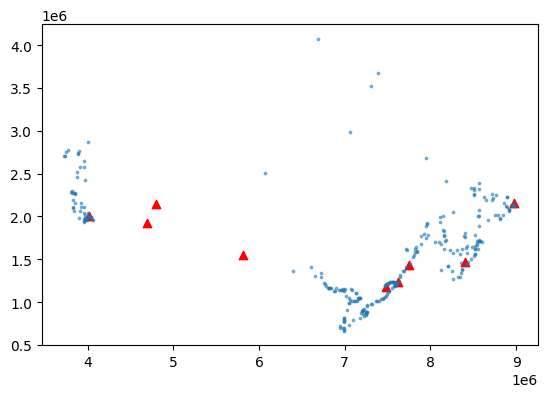

In [ ]:
#Con la dataFrames cargados filtramos la informacion que necesitamos "large_airport" y luego es ploteado
# subsetting
largeAirports=airports[airports['kind']=='large_airport'] #can't use "airports.type"
largeAirports.reset_index(drop=True, inplace=True)

#plotting
base=largeAirports.plot(color='red',marker="^")
seaports_ca_3347.plot(ax=base,alpha=0.5,markersize=3)

<Axes: >

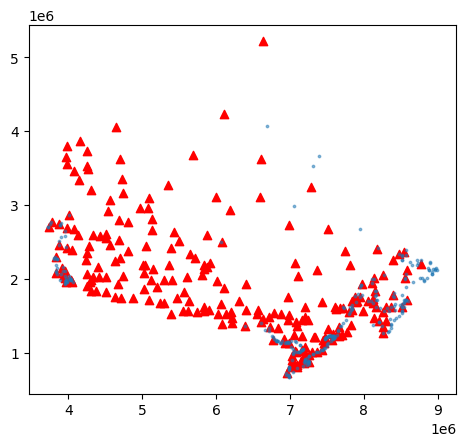

In [ ]:
#Con la dataFrames cargados filtramos la informacion que necesitamos "medium_airport" y luego es ploteado

# subsetting
mediumAirports=airports[airports['kind']=='medium_airport'] #can't use "airports.type"
mediumAirports.reset_index(drop=True, inplace=True)

#plotting
base=mediumAirports.plot(color='red',marker="^")
seaports_ca_3347.plot(ax=base,alpha=0.5,markersize=3)

SE VE LA DATA LOS DATAFRAMES DE LOS LARGE_AIRPORT;MEDIUM_AIRPORT Y SEAPORTS

In [ ]:
seaports_ca_3347.head()

,portName,Country Code,Latitude,Longitude,geometry
0,Montreal,Canada,45.516667,-73.550000,POINT (7632597.025 1246633.042)
1,Cardinal,Canada,44.783333,-75.383333,POINT (7513850.685 1127261.092)
2,Coteau Landing,Canada,45.250000,-74.200000,POINT (7591350.976 1203300.064)
3,Cornwall,Canada,45.016667,-74.733333,POINT (7557401.975 1166389.367)
4,Lower Lakes Terminal,Canada,44.733333,-75.466667,POINT (7508799.738 1120071.300)


In [ ]:
largeAirports.head()

,name,kind,latitude_deg,longitude_deg,elevation_ft,region_name,municipality,geometry
0,Vancouver International Airport,large_airport,49.193901,-123.183998,14.0,British Columbia,Vancouver,POINT (4010115.329 2000815.126)
1,Montreal / Pierre Elliott Trudeau Internationa...,large_airport,45.467837,-73.742294,118.0,Quebec,Montréal,POINT (7619517.289 1237037.385)
2,Calgary International Airport,large_airport,51.118822,-114.009933,3557.0,Alberta,Calgary,POINT (4692351.302 1928852.339)
3,Ottawa Macdonald-Cartier International Airport,large_airport,45.322498,-75.669197,374.0,Ontario,Ottawa,POINT (7476210.762 1180389.354)
4,Edmonton International Airport,large_airport,53.309700,-113.580002,2373.0,Alberta,Edmonton,POINT (4801167.526 2145906.214)


In [ ]:
mediumAirports.head()

,name,kind,latitude_deg,longitude_deg,elevation_ft,region_name,municipality,geometry
0,Billy Bishop Toronto City Centre Airport,medium_airport,43.627499,-79.396202,252.0,Ontario,Toronto,POINT (7224333.587 925620.923)
1,Victoria International Airport,medium_airport,48.647201,-123.427792,63.0,British Columbia,Victoria,POINT (3965530.608 1955756.633)
2,London Airport,medium_airport,43.035599,-81.153900,912.0,Ontario,London,POINT (7092745.018 832780.612)
3,John C. Munro Hamilton International Airport,medium_airport,43.173599,-79.934998,780.0,Ontario,Hamilton,POINT (7190253.037 866321.421)
4,Kingston Norman Rogers Airport,medium_airport,44.225300,-76.596901,305.0,Ontario,Kingston,POINT (7434098.538 1041668.646)


In [ ]:
#Distancia entre dos puntos
# distance between 'Vancouver International Airport' and 'Montreal'
largeAirports.iloc[0].geometry.distance(seaports_ca_3347.iloc[0].geometry)/1000  # in km

3700.157328582709

In [ ]:
#Distancia entre dos puntos
# distance between 'Billy Bishop Toronto City Centre Airport' and 'Montreal'
mediumAirports.iloc[0].geometry.distance(seaports_ca_3347.iloc[0].geometry)/1000  # in km

519.3532662382701

In [ ]:
#Calculamos la distancia entre el dataframe de LARGE_AIRPORT y SEAPORTS
#reorder previous output for large airports

seaports_ca_3347.set_index('portName').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)

name,Calgary International Airport,Edmonton International Airport,Halifax / Stanfield International Airport,Montreal / Pierre Elliott Trudeau International Airport,Ottawa Macdonald-Cartier International Airport,Quebec Jean Lesage International Airport,St. John's International Airport,Vancouver International Airport,Winnipeg / James Armstrong Richardson International Airport
portName,,,,,,,,,
Ahousat,879.295731,969.232701,4618.959199,3886.948158,3761.106090,3976.245074,5141.627382,209.945175,2062.639456
Alert Bay,904.306435,954.921106,4621.950885,3904.037208,3781.911204,3984.572249,5121.080837,309.506433,2090.322331
Alliford Bay,1233.511445,1206.238069,4836.066796,4155.753071,4042.897781,4215.188424,5272.209290,753.622923,2383.902536
Amherstburg,2566.366257,2585.974034,1648.155791,859.905420,713.887124,1087.336642,2494.948231,3210.772723,1411.095428
Argentia,4227.514086,4116.867244,792.983733,1543.988545,1695.401346,1330.680703,99.999168,4907.815957,3146.040528
...,...,...,...,...,...,...,...,...,...
Wiarton,2535.849517,2523.119523,1415.210661,596.683853,442.606031,800.867162,2221.487603,3203.771475,1350.475117
Windsor,3691.652453,3618.710726,53.256713,766.613145,920.247721,603.848009,934.024477,4377.520724,2539.507784
Windsor,2556.272022,2573.723956,1634.560995,842.589321,695.457391,1068.759435,2478.443299,3202.608880,1397.839596


In [ ]:
#La conversion de la distancia calculada en KM
distanceMatrixKM_sea_large_air= seaports_ca_3347.set_index('portName').geometry.apply\
                          (lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
                          sort_index(axis=0).sort_index(axis=1)

In [ ]:
#Calculamos la distancia entre el dataframe de MEDIUM_AIRPORT y SEAPORTS
#reorder previous output for medium airports

seaports_ca_3347.set_index('portName').geometry.apply\
(lambda g: mediumAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)

name,Abbotsford International Airport,Alert Airport,Alma Airport,Amos/Magny Airport,Anahim Lake Airport,Armstrong Airport,Atikokan Municipal Airport,Baie-Comeau Airport,Baker Lake Airport,Barrie-Lake Simcoe Regional Airport,...,Whitehorse / Erik Nielsen International Airport,Wiarton Airport,Williams Lake Airport,Windsor Airport,Winnipeg / St. Andrews Airport,Wrigley Airport,Yarmouth Airport,Yellowknife International Airport,Yorkton Municipal Airport,Îles-de-la-Madeleine Airport
portName,,,,,,,,,,,,,,,,,,,,,
Ahousat,271.629757,4181.971844,3872.387053,3424.108415,354.112126,2632.228690,2487.428330,4069.119625,2385.982647,3533.876945,...,1368.657564,3409.524330,426.472655,3418.340116,2074.112814,1527.969853,4510.890298,1600.536763,1679.110138,4579.766229
Alert Bay,370.741912,4053.126228,3874.305287,3434.806645,234.498174,2647.335315,2515.788862,4064.051167,2305.548179,3564.788758,...,1211.971558,3442.073372,380.088512,3465.028264,2100.374016,1391.008086,4521.354827,1491.865428,1699.667909,4572.067245
Alliford Bay,811.909855,3843.296462,4090.148048,3674.978071,451.928227,2905.646385,2804.534705,4261.276934,2308.252708,3849.588523,...,835.610918,3731.213480,671.663495,3783.432937,2390.856942,1188.808524,4754.110102,1420.633591,1987.038780,4759.605125
Amherstburg,3152.237876,4525.914932,1162.763193,825.528462,3346.016319,1026.634846,1012.487229,1416.121272,2581.546268,401.269026,...,3976.076431,343.839518,3126.341574,23.596480,1407.293314,3461.802987,1435.780431,3028.860613,1805.387144,1812.306884
Argentia,4864.333094,3885.070940,1328.517336,1815.326659,4871.567912,2556.402867,2782.362754,1077.255341,3091.955463,2021.577408,...,5030.706960,2129.427586,4686.964929,2381.123758,3127.676581,4386.327162,1034.012472,3958.548572,3463.503373,592.575349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wiarton,3148.065281,4213.591392,845.636551,482.604301,3300.055284,854.255020,925.920919,1105.280978,2333.737574,131.192657,...,3847.772092,2.161020,3084.176916,319.676819,1341.525827,3301.438696,1227.585960,2858.280174,1745.282652,1538.679665
Windsor,4328.140375,4134.051341,698.567450,1155.080095,4397.292924,1947.816895,2137.668559,557.367731,2870.887056,1241.161346,...,4718.052588,1360.430940,4196.553215,1578.869112,2523.976559,4097.173560,206.135994,3649.577392,2897.772165,329.619928
Windsor,3144.251200,4500.746908,1141.645495,800.711093,3335.211888,1006.264224,996.673677,1395.758600,2558.752180,380.133092,...,3960.114810,319.300728,3115.716168,8.115366,1393.703791,3443.813529,1423.863018,3010.176940,1792.717542,1795.490527


In [ ]:
#La conversion de la distancia calculada en KM
distanceMatrixKM_sea_medium_air= seaports_ca_3347.set_index('portName').geometry.apply\
                          (lambda g: mediumAirports.set_index('name').geometry.distance(g)/1000).\
                          sort_index(axis=0).sort_index(axis=1)

In [ ]:
#Ordenamos de menor a mayor la distancia calculadas
# the mean distance from a seaport to all the large airports (sorted)
distanceMatrixKM_sea_large_air.mean(axis=1).sort_values(ascending=True) #axis=0?

portName
Montebello         1580.476640
Thurso             1580.488809
Fassett            1580.783407
Papineauville      1580.931947
Rockland           1581.482486
                      ...     
Port Simpson       3011.517205
Masset Harbor      3120.335660
Alliford Bay       3122.154482
Port Clements      3127.055952
Queen Charlotte    3127.805625
Length: 284, dtype: float64

In [ ]:
#Usamos SomeStats para calculo de media, distancia máxima y distancia mínima
#axis 1 - distancia de los seaports hacia...
SomeStats=pd.DataFrame()
SomeStats['mean']=distanceMatrixKM_sea_large_air.mean(axis=1)
SomeStats['min']=distanceMatrixKM_sea_large_air.min(axis=1)
SomeStats['max']=distanceMatrixKM_sea_large_air.max(axis=1)

# see some
SomeStats.head(10)

,mean,min,max
portName,,,
Ahousat,2833.999885,209.945175,5141.627382
Alert Bay,2852.512076,309.506433,5121.080837
Alliford Bay,3122.154482,753.622923,5272.209290
Amherstburg,1842.049072,713.887124,3210.772723
Argentia,2429.032368,99.999168,4907.815957
Arichat Harbour,2093.282715,211.577398,4557.503636
Arnold's Cove,2417.797452,94.185720,4879.629140
Baddeck Harbour,2090.848784,258.498528,4540.176781
Baie Comeau,1746.208589,365.926796,3883.687542


In [ ]:
# farthest airport to each seaport
#aeropuerto más lejano al seaport
distanceMatrixKM_sea_air = distanceMatrixKM_sea_large_air
distanceMatrixKM_sea_air.idxmax(axis=1)

portName
Ahousat                     St. John's International Airport
Alert Bay                   St. John's International Airport
Alliford Bay                St. John's International Airport
Amherstburg                  Vancouver International Airport
Argentia                     Vancouver International Airport
                                          ...               
Wiarton                      Vancouver International Airport
Windsor                      Vancouver International Airport
Windsor                      Vancouver International Airport
Wolfe Island                 Vancouver International Airport
Yarmouth Harbor (Canada)     Vancouver International Airport
Length: 284, dtype: object

In [ ]:
# farthest seaport to each airport
#ahora al reves: axis 0 - seaport más lejano al aeropuerto
distanceMatrixKM_sea_air.idxmax(axis=0)

name
Calgary International Airport                                        Bay Bulls
Edmonton International Airport                                       Bay Bulls
Halifax / Stanfield International Airport                      Queen Charlotte
Montreal / Pierre Elliott Trudeau International Airport        Queen Charlotte
Ottawa Macdonald-Cartier International Airport                 Queen Charlotte
Quebec Jean Lesage International Airport                       Queen Charlotte
St. John's International Airport                               Queen Charlotte
Vancouver International Airport                                      Bay Bulls
Winnipeg / James Armstrong Richardson International Airport          Bay Bulls
dtype: object

In [ ]:
# closest airport to each seaport
#Encontramos los aeropuertos mas ceranos al seaport
distanceMatrixKM_sea_air.idxmin(axis=1)

portName
Ahousat                                    Vancouver International Airport
Alert Bay                                  Vancouver International Airport
Alliford Bay                               Vancouver International Airport
Amherstburg                 Ottawa Macdonald-Cartier International Airport
Argentia                                  St. John's International Airport
                                                 ...                      
Wiarton                     Ottawa Macdonald-Cartier International Airport
Windsor                          Halifax / Stanfield International Airport
Windsor                     Ottawa Macdonald-Cartier International Airport
Wolfe Island                Ottawa Macdonald-Cartier International Airport
Yarmouth Harbor (Canada)         Halifax / Stanfield International Airport
Length: 284, dtype: object

In [ ]:
# closest seaport to each airport
#ahora al reves: axis 0 - seaport más cercanos al aeropuerto
distanceMatrixKM_sea_air.idxmin(axis=0)

name
Calgary International Airport                                  Mission City
Edmonton International Airport                                 Mission City
Halifax / Stanfield International Airport                           Halifax
Montreal / Pierre Elliott Trudeau International Airport            Montreal
Ottawa Macdonald-Cartier International Airport                         Hull
Quebec Jean Lesage International Airport                             Quebec
St. John's International Airport                                  St John's
Vancouver International Airport                                   Steveston
Winnipeg / James Armstrong Richardson International Airport     Thunder Bay
dtype: object

**Exercise 2**

<div class="alert-success">
    
1. Use a map of points and a map of lines from your country.

2. Compute the distance matrix for both.

3. Select one line of the distance matrix, and plot the closests and the farthest point to that line.
    
    
</div>

In [ ]:
rivers.head()

,NAME,SYSTEM,geometry
0,Niagara,None,"MULTILINESTRING ((6999631.028 767821.983, 7013..."
1,Koukdjuak,None,"MULTILINESTRING ((7072138.550 3493108.566, 707..."
2,St. Lawrence,None,"MULTILINESTRING ((7792331.791 1443423.150, 775..."
3,St. Clair,None,"MULTILINESTRING ((6999631.028 767821.983, 7002..."
4,Columbia,None,"MULTILINESTRING ((4371520.956 1803208.645, 438..."


In [ ]:
#keep one:

rivers[rivers.NAME.str.contains('Niagara')]

,NAME,SYSTEM,geometry
0,Niagara,None,"MULTILINESTRING ((6999631.028 767821.983, 7013..."


In [ ]:
# distance from each airport to Niagara
rivers[rivers.NAME.str.contains('Niagara')].iloc[0].geometry.distance(largeAirports.set_index('name').geometry)/1000

name
Vancouver International Airport                                3213.222258
Montreal / Pierre Elliott Trudeau International Airport         511.805777
Calgary International Airport                                  2565.286755
Ottawa Macdonald-Cartier International Airport                  379.748130
Edmonton International Airport                                 2577.755517
Winnipeg / James Armstrong Richardson International Airport    1399.782587
Halifax / Stanfield International Airport                      1284.131631
Quebec Jean Lesage International Airport                        746.445450
St. John's International Airport                               2137.411750
Name: geometry, dtype: float64

In [ ]:
#Calcula la distancia entre rios a aeropuertos y los organiza
distanceMatrixKM_riv_air=rivers.set_index('NAME').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)
distanceMatrixKM_riv_air

name,Calgary International Airport,Edmonton International Airport,Halifax / Stanfield International Airport,Montreal / Pierre Elliott Trudeau International Airport,Ottawa Macdonald-Cartier International Airport,Quebec Jean Lesage International Airport,St. John's International Airport,Vancouver International Airport,Winnipeg / James Armstrong Richardson International Airport
NAME,,,,,,,,,
Columbia,143.315454,297.956581,3876.722774,3134.373524,3006.832184,3229.772004,4430.656567,383.853882,1307.161637
Dauphin,1012.198091,966.925303,2623.560514,1871.318616,1744.440052,1971.968714,3200.420532,1697.653453,64.329648
Great Bear,1547.652496,1319.736572,3881.235588,3386.348480,3319.759543,3361.424779,4087.264193,1715.152719,2072.744113
Koukdjuak,2788.906067,2580.044673,2363.516050,2262.975132,2290.701135,2107.910679,2245.930500,3343.428467,2277.214303
Mackenzie,1069.530192,831.876772,3416.890110,2882.805538,2809.791995,2870.841808,3704.881513,1118.374236,1558.764461
Nelson,1036.986177,954.125555,2405.118624,1758.956276,1634.015399,1820.670969,2826.120414,1720.892329,76.738678
Niagara,2565.286755,2577.755517,1284.131631,511.805777,379.748130,746.445450,2137.411750,3213.222258,1399.782587
Nipigon,1767.388335,1727.249882,1917.418305,1159.354361,1031.657005,1265.323853,2555.669814,2449.528057,597.565605
Peace,586.448176,392.122703,3491.859077,2878.731062,2786.489056,2901.470337,3874.452700,665.191739,1334.049485


In [ ]:
distanceMatrixKM_riv_air.loc['Niagara'].sort_values()

name
Ottawa Macdonald-Cartier International Airport                  379.748130
Montreal / Pierre Elliott Trudeau International Airport         511.805777
Quebec Jean Lesage International Airport                        746.445450
Halifax / Stanfield International Airport                      1284.131631
Winnipeg / James Armstrong Richardson International Airport    1399.782587
St. John's International Airport                               2137.411750
Calgary International Airport                                  2565.286755
Edmonton International Airport                                 2577.755517
Vancouver International Airport                                3213.222258
Name: Niagara, dtype: float64

In [ ]:
#Se necesita instalar esta extension del mapclassify
!pip install mapclassify

In [ ]:
base=largeAirports.explore(color='red',marker_kwds=dict(radius=10))
rivers[rivers.NAME.str.contains('Niagara')].explore(m=base)

In [ ]:
rivers[~rivers.SYSTEM.isna()]

,NAME,SYSTEM,geometry
10,Peace,Mackenzie,"MULTILINESTRING ((4335081.958 2686748.465, 433..."
11,Slave,Mackenzie,"MULTILINESTRING ((5137506.790 2670814.949, 514..."
13,Mackenzie,Mackenzie,"MULTILINESTRING ((5096749.994 2964399.099, 512..."
14,Great Bear,Mackenzie,"MULTILINESTRING ((4832494.749 3541471.957, 487..."


In [ ]:
systems=rivers.dissolve(by='SYSTEM')
systems

,geometry,NAME
SYSTEM,,
Mackenzie,"MULTILINESTRING ((4335081.958 2686748.465, 433...",Peace


In [ ]:
# format the GDF:

systems.reset_index(drop=False,inplace=True)
systems.drop(columns='NAME',inplace=True)

# we have
systems

,SYSTEM,geometry
0,Mackenzie,"MULTILINESTRING ((4335081.958 2686748.465, 433..."


In [ ]:
#Se calcula la distancias en kilómetros entre las geometrías en systems y largeAirports
distanceMatrixKM_sys_air=systems.set_index('SYSTEM').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)

distanceMatrixKM_sys_air

name,Calgary International Airport,Edmonton International Airport,Halifax / Stanfield International Airport,Montreal / Pierre Elliott Trudeau International Airport,Ottawa Macdonald-Cartier International Airport,Quebec Jean Lesage International Airport,St. John's International Airport,Vancouver International Airport,Winnipeg / James Armstrong Richardson International Airport
SYSTEM,,,,,,,,,
Mackenzie,586.448176,392.122703,3196.845156,2599.725789,2513.080474,2613.750926,3573.330861,665.191739,1163.4623


In [ ]:
mins=distanceMatrixKM_sys_air.idxmin(axis="columns") # same as axis=1
mins

SYSTEM
Mackenzie    Edmonton International Airport
dtype: object

In [ ]:
# one of them
mins.iloc[0]

'Edmonton International Airport'

In [ ]:
#Visualizamos los aeropuertos grandes en un mapa, diferenciando los aeropuertos más cercanos y los que no
base=systems.explore()
# the closest
largeAirports[largeAirports.name.isin(mins)].explore(m=base,color='red',marker_kwds=dict(radius=10))
# NOT the closest
largeAirports[~largeAirports.name.isin(mins)].explore(m=base,color='blue',marker_kwds=dict(radius=5))

Exercise 3

<div class="alert-success">
    
1. Create a HULL for some set of line map.

2. Compute the distance matrix between the HULLS and a map of points.

3. Plot the HULLS and the points. Show the closest and farthest points to the HULL.
    
</div>   

In [ ]:
#Generamos un poligono con los puntos del Dataframe
# polygon for each system
systems.convex_hull

0    POLYGON ((4663155.278 2514573.310, 4339678.023...
dtype: geometry

<Axes: >

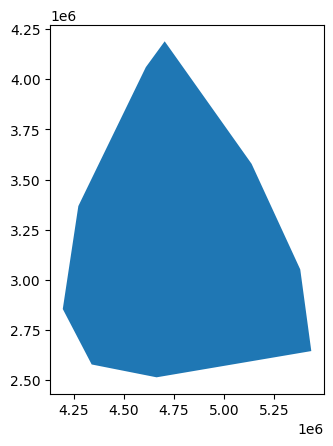

In [ ]:
# see them
systems.convex_hull.plot()

In [ ]:
#Encontramos los puntos que conformaran el Poligono Niagara
systems_hulls=systems.convex_hull.to_frame()
systems_hulls['system']=['Niagara']
systems_hulls.rename(columns={0:'geometry'},inplace=True)
systems_hulls=systems_hulls.set_geometry('geometry')
systems_hulls.crs="EPSG:3347"
systems_hulls

,geometry,system
0,"POLYGON ((4663155.278 2514573.310, 4339678.023...",Niagara


In [ ]:
#Distancia entre los aeropuerto al Niagara en Km
distanceMatrixKM_sysHull_air=systems_hulls.set_index('system').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)

distanceMatrixKM_sysHull_air

name,Calgary International Airport,Edmonton International Airport,Halifax / Stanfield International Airport,Montreal / Pierre Elliott Trudeau International Airport,Ottawa Macdonald-Cartier International Airport,Quebec Jean Lesage International Airport,St. John's International Airport,Vancouver International Airport,Winnipeg / James Armstrong Richardson International Airport
system,,,,,,,,,
Niagara,586.448176,386.556804,3196.845156,2599.725789,2513.080474,2613.750926,3573.330861,665.191739,1163.4623


In [ ]:
mins=distanceMatrixKM_sysHull_air.idxmin(axis="columns")
mins

system
Niagara    Edmonton International Airport
dtype: object

In [ ]:
# plotting
base=systems_hulls.explore()
largeAirports[largeAirports.name.isin(mins)].explore(m=base,color='red',marker_kwds=dict(radius=10
                                                                                        ))
largeAirports[~largeAirports.name.isin(mins)].explore(m=base,color='blue',marker_kwds=dict(radius=5))

### Exercise 4

<div class="alert-success">
    
1. Select a line map and a point one.

2. Get the buffer for the lines, select a distance.

3. Keep the points that are within the buffer (you might need to play with differn distances until you show something interesting.  
    
</div>  

In [ ]:
#Distancia entre los rios y aeropuertos
# remember:
distanceMatrixKM_riv_air

NameError: name 'distanceMatrixKM_riv_air' is not defined

In [ ]:
#Distancia entre rios
# getting a value (it can be any value)
distanceMatrixKM_riv_air.loc['Niagara'].min() # I chose min

379.7481300246493

In [ ]:
minMts=distanceMatrixKM_riv_air.loc['Niagara'].min()*1000 # km

#the buffer is a polygon:
rivers[rivers.NAME=='Niagara'].buffer(distance = minMts)

0    POLYGON ((6608973.125 870157.012, 6623332.501 ...
dtype: geometry

In [ ]:
# see buffer:
bufferAroundNiagara=rivers[rivers.NAME=='Niagara'].buffer(distance = minMts)
bufferAsBase=bufferAroundNiagara.explore(color='red')
rivers[rivers.NAME=='Niagara'].explore(m=bufferAsBase,color='blue',style_kwds={'weight':0.5})

In [ ]:
small_airports=airports[airports['kind']=='small_airport']

# plotting
rivers[rivers.NAME=='Niagara'].explore(m=bufferAsBase,color='blue',style_kwds={'weight':0.5})
small_airports.explore(m=bufferAsBase,color='black')

In [ ]:

riversWithinBuffer=small_airports.clip(mask=bufferAroundNiagara)
#
riversWithinBuffer

,name,kind,latitude_deg,longitude_deg,elevation_ft,region_name,municipality,geometry
131,Pelee Island Airport,small_airport,41.778033,-82.674222,572.0,Ontario,Pelee Island,POINT (6987745.788 670442.083)
409,Leamington Airport,small_airport,42.025002,-82.525002,576.0,Ontario,Leamington,POINT (6996292.522 700354.117)
1385,Harrow Airport,small_airport,42.059399,-82.840797,610.0,Ontario,Harrow,POINT (6968999.798 700373.524)
1345,Essex Airport,small_airport,42.095798,-82.879402,620.0,Ontario,Essex,POINT (6965144.684 704041.361)
1293,Cottam Airport,small_airport,42.139999,-82.652802,635.0,Ontario,Cottam,POINT (6983571.519 711817.199)
...,...,...,...,...,...,...,...,...
1210,Arnstein Airport,small_airport,45.925598,-79.927803,745.0,Ontario,Arnstein,POINT (7132653.537 1172798.091)
1364,Alban Airport,small_airport,46.091185,-80.608456,700.0,Ontario,French River,POINT (7076773.247 1181446.341)
1305,Bonnechere Soaring Aerodrome,small_airport,46.063101,-77.487147,NaN,Ontario,Deep River,POINT (7316868.861 1227275.446)
916,Mattawa Airport,small_airport,46.299702,-78.747803,600.0,Ontario,Mattawa,POINT (7214963.583 1232142.366)


In [ ]:
# plotting the airports within buffer
bufferAsBase=bufferAroundNiagara.explore(color='red')
rivers[rivers.NAME=='Niagara'].explore(m=bufferAsBase,color='blue',style_kwds={'weight':0.5})
riversWithinBuffer.explore(m=bufferAsBase,color='black')

In [ ]:
# minimum of all the minimum by row
distanceMatrixKM_riv_air.min(axis=1).min()

4.562524010104248

In [ ]:
# using the previous value
minMinMts_5=5*distanceMatrixKM_riv_air.min(axis=1).min()*1000


allMinBuffer=rivers.buffer(distance = minMinMts_5).explore(color='red')
rivers.explore(m=allMinBuffer,color='blue',style_kwds={'weight':0.5})

In [ ]:
# you see all the buffer polygons:
riversAll_buf=rivers.buffer(distance = minMinMts_5)
riversAll_buf

0     POLYGON ((6944699.724 748952.190, 6945562.335 ...
1     POLYGON ((7005606.810 3466050.755, 7003368.303...
2     MULTIPOLYGON (((7595992.326 1233462.927, 75950...
3     POLYGON ((6385278.301 1357574.887, 6395549.688...
4     POLYGON ((4365633.817 1825342.280, 4369229.389...
5     POLYGON ((6395506.432 1510569.022, 6394911.743...
6     POLYGON ((5699156.821 1703191.569, 5698771.625...
7     POLYGON ((5631802.689 1866538.417, 5629752.732...
8     POLYGON ((5587956.679 2008523.458, 5565534.388...
9     POLYGON ((5725566.794 1891698.050, 5724672.106...
10    POLYGON ((4219317.366 2878932.677, 4223818.990...
11    POLYGON ((5095919.426 2940068.409, 5088059.938...
12    POLYGON ((4112164.389 3790052.990, 4127997.860...
13    POLYGON ((4299977.329 3364735.620, 4328863.258...
14    POLYGON ((4729322.188 3542192.525, 4727170.044...
dtype: geometry

In [ ]:
allRiversWithinBuffs=small_airports.clip(riversAll_buf)
allRiversWithinBuffs

,name,kind,latitude_deg,longitude_deg,elevation_ft,region_name,municipality,geometry
409,Leamington Airport,small_airport,42.025002,-82.525002,576.0,Ontario,Leamington,POINT (6996292.522 700354.117)
1385,Harrow Airport,small_airport,42.059399,-82.840797,610.0,Ontario,Harrow,POINT (6968999.798 700373.524)
1345,Essex Airport,small_airport,42.095798,-82.879402,620.0,Ontario,Essex,POINT (6965144.684 704041.361)
1293,Cottam Airport,small_airport,42.139999,-82.652802,635.0,Ontario,Cottam,POINT (6983571.519 711817.199)
1433,Essex/Billing Airstrip,small_airport,42.186668,-82.782219,630.0,Ontario,Lakeshore,POINT (6971879.386 715530.183)
...,...,...,...,...,...,...,...,...
557,Ford Bay Airport,small_airport,66.037498,-124.714996,673.0,Northwest Territories,Ford Bay,POINT (4818865.950 3650884.970)
1188,Minto,small_airport,62.604722,-137.221944,2969.0,Yukon,None,POINT (4127564.923 3686927.810)
1363,Fort Selkirk Airport,small_airport,62.768300,-137.384704,1501.0,Yukon,Fort Selkirk,POINT (4133040.644 3705582.665)
871,Great Bear Lake Airport,small_airport,66.703053,-119.716816,562.0,Northwest Territories,Great Bear Lake,POINT (5044588.224 3615181.231)


<Axes: >

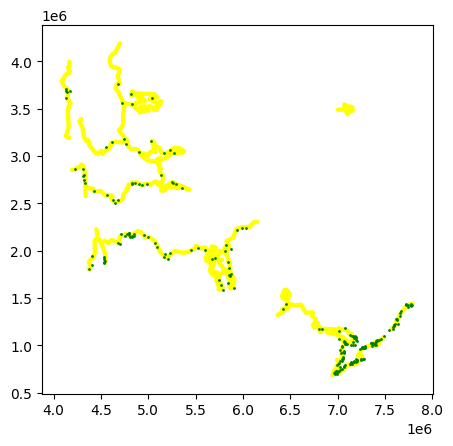

In [ ]:
#keeping small airports in buffer
#simple
base=riversAll_buf.plot(color='yellow')
allRiversWithinBuffs.plot(ax=base, color='green', markersize=1)

In [ ]:
# folium

base=riversAll_buf.explore(color='yellow')
allRiversWithinBuffs.explore(m=base, color='green')